In [46]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
import pytz
from pytz import timezone
from pandas.io import sql
import pymysql.cursors

import numpy
from numpy import mean

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

###### Please find below questions related to "nutrition" part of the study

- Macro nutrient balance (protein,carbs,fat) of people's main meals ? 
- What proportion of calories comes from each category ? 
- Does it vary by gender ? 
- By country ?

#### Source 
-> https://vitals.lifehacker.com/count-macronutrients-instead-of-calories-for-better-die-1706873465


**from this source, we get following balance:**

*Protein*
Calories: 4 calories per gram
    
*Carbohydrates*
Calories: 4 calories per gram

*Fats*
Calories: 9 calories per gram.

In [64]:
#Importing all datasets (all of operations are detailled in notebooks from directory called "exploring")

#users with complete timezone
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users_timezone.csv',error_bad_lines=False)

#food
food_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/food.csv',error_bad_lines=False)

#exercise
ex_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/exercise.csv',error_bad_lines=False)

#weight
weight_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/weight.csv',error_bad_lines=False)



################# SQL VIEWS #####################
food2_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/from_DB/_view_food_with_gender_and_country.csv',error_bad_lines=False)

In [65]:
food2_df.head()

,index,food_item_id,user_id,date,meal,calories,protein,fat,carbohydrates,gender,country
0,30,2136718473,23684401,2017-07-23,lunch,39,0.8,1.8,4.6,f,DE
1,2664,2135142021,23684401,2017-07-22,lunch,669,27.9,58.1,8.1,f,DE
2,2718,2136718471,23684401,2017-07-23,lunch,536,96.5,16.3,0.1,f,DE
3,2793,2198684590,23684401,2017-08-24,lunch,164,3.8,16.3,3.4,f,DE
4,2819,2186924840,23684401,2017-08-18,breakfast,164,3.8,16.3,3.4,f,DE


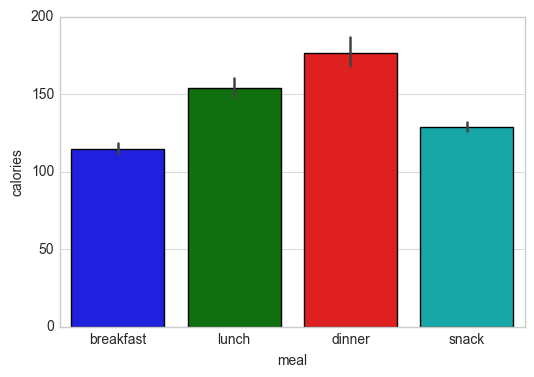

In [66]:
# Mean calories per meal for female

foodfemale_df = food_df.copy()
foodfemale_df = food_df.loc[(food2_df['gender'] == 'f')]

sns.barplot(x="meal", y="calories", data=foodfemale_df)

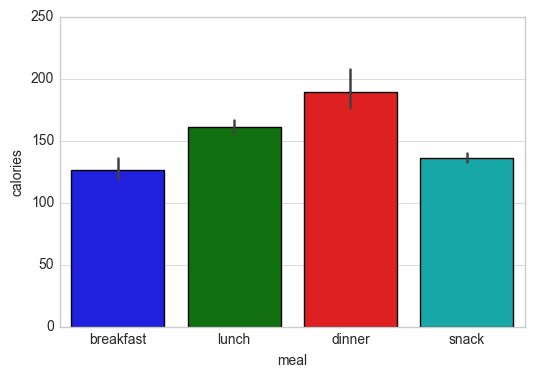

In [50]:
# Mean calories per meal for male

foodmale_df = food_df.copy()
foodmale_df = food_df.loc[(food2_df['gender'] == 'm')]

sns.barplot(x="meal", y="calories", data=foodmale_df)

Comment: 

-> We have a little bit more calories consumed by male

In [68]:
# Getting the main countries
country_df = food2_df.loc[(food2_df['country'] == 'US') | (food2_df['country'] == 'DE') | (food2_df['country'] == 'RU') | (food2_df['country'] == 'GB') | (food2_df['country'] == 'SE')]
country_df = country_df.reset_index(drop=True)
country_df.head()

,index,food_item_id,user_id,date,meal,calories,protein,fat,carbohydrates,gender,country
0,30,2136718473,23684401,2017-07-23,lunch,39,0.8,1.8,4.6,f,DE
1,2664,2135142021,23684401,2017-07-22,lunch,669,27.9,58.1,8.1,f,DE
2,2718,2136718471,23684401,2017-07-23,lunch,536,96.5,16.3,0.1,f,DE
3,2793,2198684590,23684401,2017-08-24,lunch,164,3.8,16.3,3.4,f,DE
4,2819,2186924840,23684401,2017-08-18,breakfast,164,3.8,16.3,3.4,f,DE


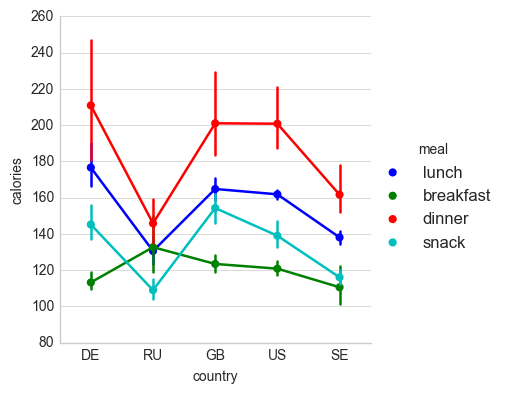

In [70]:
# Calories consumed per country
sns.factorplot(x="country", y="calories", hue="meal", data=country_df)